In [86]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import json, joblib
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Data Loading:

In [87]:
path = "dubizzle_cars.csv"

df = pd.read_csv(path)

In [88]:
df

,car_title,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,contact_number,brand
0,Porsche Taycan 4S 2021,"Al Ghubrah, Muscat•",2021,"OMR 39,900",43000,Automatic,'4/5,Company Source,Taycan,White,NaN,Porsche
1,Porsche - Cayenne 2019,"Al Ghubrah, Muscat•",2019,"OMR 28,000",58000,Automatic,'4/5,Company Source,Cayenne,Purple,NaN,Porsche
2,Toyota LC 3.5 TT GX-R 7 SUPREME = MY: 2022,"Ruwi, Muscat•",2022,"OMR 24,500",155274,Manual,'4/5,GCC,Land Cruiser,White,NaN,Toyota
3,Kia K8 2024 K8 3.5 GDI SPL - MY 2024,"Ruwi, Muscat•",2024,"OMR 12,500",5491,Automatic,'4/5,GCC,K8,White,NaN,Kia
4,TOYOTA RAV4 PREMIUM +TH1 - MY: 2017,"Ruwi, Muscat•",2017,"OMR 6,200",165989,Automatic,'4/5,GCC,Rav 4,White,NaN,Toyota
...,...,...,...,...,...,...,...,...,...,...,...,...
6733,تويوتا هايلاندر 2018,"Saham, Al Batinah•",2018,"OMR 7,000",240000,Automatic,NaN,US,Highlander,White,NaN,Unknown
6734,مرسيدس بنز إي 350 2016,"Al Khaboura, Al Batinah•",2016,"OMR 5,900",80000,Automatic,'4/5,US,E 350,Black,NaN,Mercedes
6735,جيب جراند شيروكى 2017,"Al Mawaleh, Muscat•",2017,"OMR 7,000",227000,Automatic,NaN,GCC,Grand Cherokee,White,NaN,Unknown
6736,Toyota Corolla 2018,"Ruwi, Muscat•",2018,"OMR 4,300",175373,Manual,'4/5,GCC,Corolla,White,NaN,Toyota


# Data Cleaning:

Remove unneeded columns:

In [89]:
df = df.drop(columns=['contact_number', 'car_title'])

Remove Duplicates:

In [90]:
df.duplicated().sum()

np.int64(126)

In [91]:
df

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand
0,"Al Ghubrah, Muscat•",2021,"OMR 39,900",43000,Automatic,'4/5,Company Source,Taycan,White,Porsche
1,"Al Ghubrah, Muscat•",2019,"OMR 28,000",58000,Automatic,'4/5,Company Source,Cayenne,Purple,Porsche
2,"Ruwi, Muscat•",2022,"OMR 24,500",155274,Manual,'4/5,GCC,Land Cruiser,White,Toyota
3,"Ruwi, Muscat•",2024,"OMR 12,500",5491,Automatic,'4/5,GCC,K8,White,Kia
4,"Ruwi, Muscat•",2017,"OMR 6,200",165989,Automatic,'4/5,GCC,Rav 4,White,Toyota
...,...,...,...,...,...,...,...,...,...,...
6733,"Saham, Al Batinah•",2018,"OMR 7,000",240000,Automatic,NaN,US,Highlander,White,Unknown
6734,"Al Khaboura, Al Batinah•",2016,"OMR 5,900",80000,Automatic,'4/5,US,E 350,Black,Mercedes
6735,"Al Mawaleh, Muscat•",2017,"OMR 7,000",227000,Automatic,NaN,GCC,Grand Cherokee,White,Unknown
6736,"Ruwi, Muscat•",2018,"OMR 4,300",175373,Manual,'4/5,GCC,Corolla,White,Toyota


Drop Duplicted Rows

In [92]:
df = df.drop_duplicates()

Null Values Checking

In [93]:
df.isnull().sum()

location                0
year                    0
price                   0
kilometers              0
transmission_type      19
number_of_doors      1549
source                 19
model                  22
color                  19
brand                   0
dtype: int64

Remove the Rows which are Contains the Null Values

In [94]:
df = df.dropna()
df.isnull().sum()

location             0
year                 0
price                0
kilometers           0
transmission_type    0
number_of_doors      0
source               0
model                0
color                0
brand                0
dtype: int64

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5061 entries, 0 to 6736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           5061 non-null   object
 1   year               5061 non-null   int64 
 2   price              5061 non-null   object
 3   kilometers         5061 non-null   object
 4   transmission_type  5061 non-null   object
 5   number_of_doors    5061 non-null   object
 6   source             5061 non-null   object
 7   model              5061 non-null   object
 8   color              5061 non-null   object
 9   brand              5061 non-null   object
dtypes: int64(1), object(9)
memory usage: 434.9+ KB


Checking the Non Related Values in the Rows

In [96]:
(df == "-").sum()

location               0
year                   0
price                  0
kilometers           258
transmission_type      0
number_of_doors        0
source                 0
model                  0
color                  0
brand                  0
dtype: int64

In [97]:
(df == "unknown").sum()

location             0
year                 0
price                0
kilometers           0
transmission_type    0
number_of_doors      0
source               0
model                0
color                0
brand                0
dtype: int64

Remove the Rows that Contains "-"

In [98]:
df = df[~(df == "-").any(axis=1)]
df = df[~(df == "Unknown").any(axis=1)]

Changing the Data Type for the Columns

In [99]:
df['kilometers'] = df['kilometers'].astype('int64')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4432 entries, 0 to 6736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   location           4432 non-null   object
 1   year               4432 non-null   int64 
 2   price              4432 non-null   object
 3   kilometers         4432 non-null   int64 
 4   transmission_type  4432 non-null   object
 5   number_of_doors    4432 non-null   object
 6   source             4432 non-null   object
 7   model              4432 non-null   object
 8   color              4432 non-null   object
 9   brand              4432 non-null   object
dtypes: int64(2), object(8)
memory usage: 380.9+ KB


Check the unique Values in Each Column and Remove Non Related Values

In [101]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace(r"[',.=•\\-]", '', regex=True)
    df[col] = df[col].str.strip()
    df[col] = df[col].str.lower()

In [102]:
df['number_of_doors'].unique()

array(['4/5', '2/3'], dtype=object)

In [103]:
df.shape

(4432, 10)

In [104]:
df = df[df['number_of_doors'].isin(['4/5', '2/3'])]

In [105]:
df.shape

(4432, 10)

In [106]:
df['location'].unique()

array(['al ghubrah muscat', 'ruwi muscat', 'barka al batinah',
       'al maabilah muscat', 'al hamriyah muscat', 'al khoud muscat',
       'the wave (almouj) muscat', 'azaiba muscat', 'al khuwair muscat',
       'al khaboura al batinah', 'ghala muscat', 'al seeb muscat',
       'bosher muscat', 'al hail muscat', 'al amarat muscat',
       'madinat as sultan qaboos muscat', 'darsait muscat',
       'qurum muscat', 'al rustaq al batinah', 'ansab muscat',
       'sohar al batinah', 'muscat  other muscat', 'al masna al batinah',
       'al mawaleh muscat', 'salalah dhofar', 'al buraimi al buraimi',
       'al wadi al kabir muscat', 'suwaiq al batinah', 'saham al batinah',
       'nizwa al dakhiliya', 'izki al dakhiliya', 'qurayyat muscat',
       'bahla al dakhiliya', 'liwa al batinah', 'sur al sharqiya',
       'al duqum al wusta', 'mutrah muscat', 'nakhl al batinah',
       'bidbid al dakhiliya', 'sultan haitham city muscat',
       'al kamil and al waafi al sharqiya', 'shinas al batina

In [107]:
df['year'].unique()

array([2021, 2019, 2022, 2024, 2017, 2020, 2016, 2014, 2009, 2023, 2018,
       2012, 2025, 2015, 2011, 2013, 2006, 2007, 2008, 2010, 2004, 1986,
       2005, 2002, 1996, 1998, 1999, 2003, 2001, 2000, 1994, 2026, 1995,
       1990, 1997, 1991, 1992, 1984, 1900])

In [108]:
df['price'].unique()

array(['omr 39900', 'omr 28000', 'omr 24500', 'omr 12500', 'omr 6200',
       'omr 13700', 'omr 20200', 'omr 6000', 'omr 7400', 'omr 17500',
       'omr 7500', 'omr 13500', 'omr 2400', 'omr 9900', 'omr 2200',
       'omr 18900', 'omr 14200', 'omr 6100', 'omr 11900', 'omr 4200',
       'omr 16900', 'omr 37900', 'omr 29900', 'omr 5600', 'omr 5300',
       'omr 8500', 'omr 14000', 'omr 3300', 'omr 21900', 'omr 10200',
       'omr 17700', 'omr 5100', 'omr 6500', 'omr 8200', 'omr 5200',
       'omr 7800', 'omr 30550', 'omr 7900', 'omr 14900', 'omr 15900',
       'omr 22800', 'omr 27800', 'omr 22900', 'omr 7300', 'omr 20500',
       'omr 6900', 'omr 19400', 'omr 9300', 'omr 16000', 'omr 1950',
       'omr 4999', 'omr 18700', 'omr 3900', 'omr 9800', 'omr 13200',
       'omr 30500', 'omr 14700', 'omr 27900', 'omr 8000', 'omr 11600',
       'omr 5800', 'omr 3600', 'omr 4000', 'omr 12000', 'omr 6700',
       'omr 17900', 'omr 11000', 'omr 8900', 'omr 2000', 'omr 6400',
       'omr 11500', 'omr 8

Remove OMR

In [109]:
df['price'] = df['price'].str.replace('omr', '', regex=False).str.strip()

In [110]:
df['price'] = df['price'].astype('float64')

In [111]:
df['transmission_type'].unique()

array(['automatic', 'manual'], dtype=object)

In [112]:
df['source'].unique()

array(['company source', 'gcc', 'us', 'canada', 'europe'], dtype=object)

In [113]:
df['color'].unique()

array(['white', 'purple', 'blue', 'gold', 'burgundy', 'black', 'silver',
       'brown', 'green', 'grey', 'beige', 'red', 'other', 'orange',
       'yellow'], dtype=object)

In [114]:
df.shape

(4432, 10)

In [115]:
df['brand'].unique()

array(['porsche', 'toyota', 'kia', 'chevrolet', 'mercedes', 'mazda',
       'lincoln', 'hyundai', 'range rover', 'subaru', 'bmw', 'gmc',
       'lexus', 'nissan', 'mg', 'land rover', 'foton', 'chery',
       'infiniti', 'suzuki', 'nezha', 'cadillac', 'volkswagen', 'jeep',
       'dodge', 'jetour', 'ford', 'mitsubishi', 'honda', 'audi',
       'renault', 'isuzu', 'gac', 'ram', 'mini', 'changan', 'volvo',
       'peugeot', 'fiat', 'chrysler', 'escalade', 'fuso', 'hino', 'man',
       'great wall', 'tesla', 'genesis', 'skoda', 'byd', 'bentley',
       'maserati', 'tank', 'hummer', 'alfa romeo', 'geely', 'jaguar',
       'ssang yong', 'daihatsu', 'baic', 'proton', 'jac', 'citroen'],
      dtype=object)

In [116]:
df

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota
...,...,...,...,...,...,...,...,...,...,...
6729,al khuwair muscat,2008,1500.0,18000,automatic,2/3,gcc,accord,black,honda
6730,azaiba muscat,2013,900.0,180000,automatic,4/5,company source,polo,silver,volkswagen
6731,saham al batinah,2021,5000.0,4500,automatic,4/5,us,renegade,white,jeep
6734,al khaboura al batinah,2016,5900.0,80000,automatic,4/5,us,e 350,black,mercedes


In [117]:
df.describe()

,year,price,kilometers
count,4432.000000,4432.000000,4432.000000
mean,2015.047834,4764.379287,145526.679377
std,5.687647,5076.068250,133511.666687
min,1900.000000,6.000000,1.000000
25%,2012.000000,1550.000000,35000.000000
50%,2016.000000,3300.000000,129000.000000
75%,2019.000000,5900.000000,200256.000000
max,2026.000000,75000.000000,1000000.000000


Removing Outliers 

In [118]:
numrical_cols = df.select_dtypes(include=['int64', 'float64']).columns

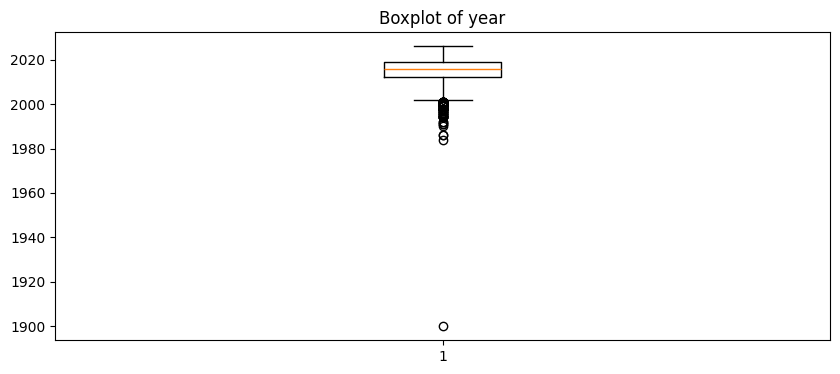

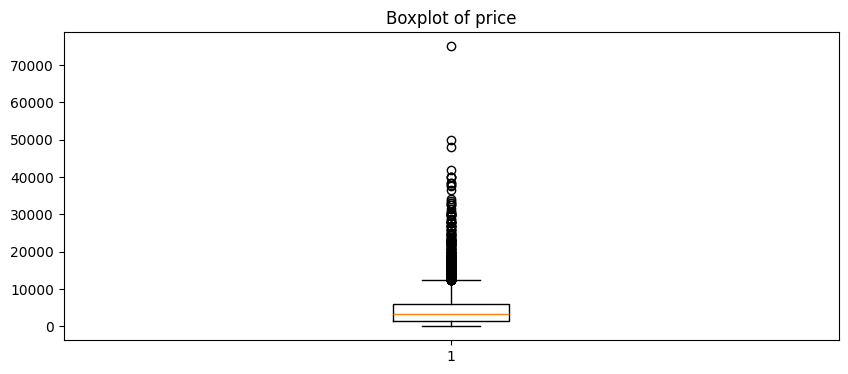

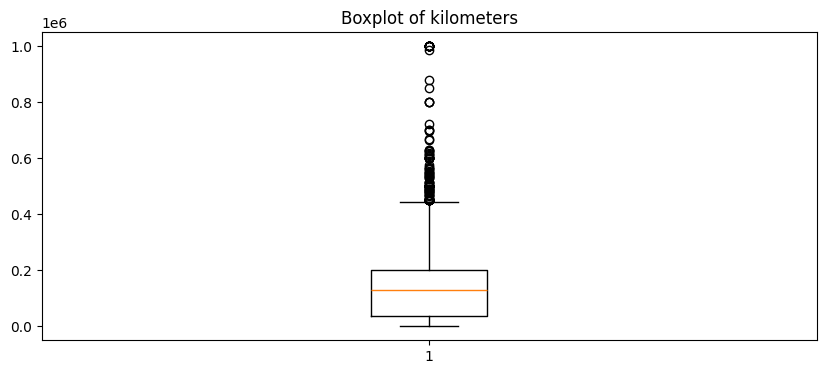

In [119]:
for num_col in numrical_cols:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[num_col])
    plt.title(f'Boxplot of {num_col}')

In [120]:
df = df[df['year'] != 1900]

In [121]:
df

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota
...,...,...,...,...,...,...,...,...,...,...
6729,al khuwair muscat,2008,1500.0,18000,automatic,2/3,gcc,accord,black,honda
6730,azaiba muscat,2013,900.0,180000,automatic,4/5,company source,polo,silver,volkswagen
6731,saham al batinah,2021,5000.0,4500,automatic,4/5,us,renegade,white,jeep
6734,al khaboura al batinah,2016,5900.0,80000,automatic,4/5,us,e 350,black,mercedes


In [122]:
df = df[df['price'] > 500]

In [123]:
df = df[df['kilometers'] > 1000]

In [124]:
df

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota
...,...,...,...,...,...,...,...,...,...,...
6729,al khuwair muscat,2008,1500.0,18000,automatic,2/3,gcc,accord,black,honda
6730,azaiba muscat,2013,900.0,180000,automatic,4/5,company source,polo,silver,volkswagen
6731,saham al batinah,2021,5000.0,4500,automatic,4/5,us,renegade,white,jeep
6734,al khaboura al batinah,2016,5900.0,80000,automatic,4/5,us,e 350,black,mercedes


In [125]:
df.describe()

,year,price,kilometers
count,3661.000000,3661.000000,3661.000000
mean,2015.288446,4909.640809,172235.521989
std,5.297628,5257.525083,125276.547289
min,1984.000000,510.000000,1111.000000
25%,2012.000000,1600.000000,87000.000000
50%,2016.000000,3400.000000,158000.000000
75%,2019.000000,6000.000000,225000.000000
max,2026.000000,75000.000000,1000000.000000


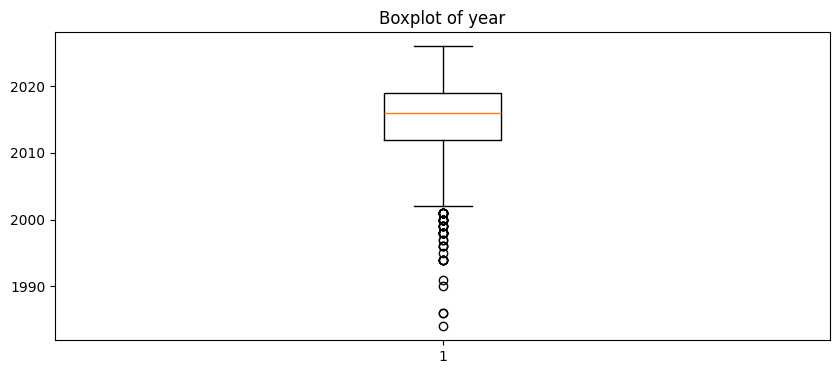

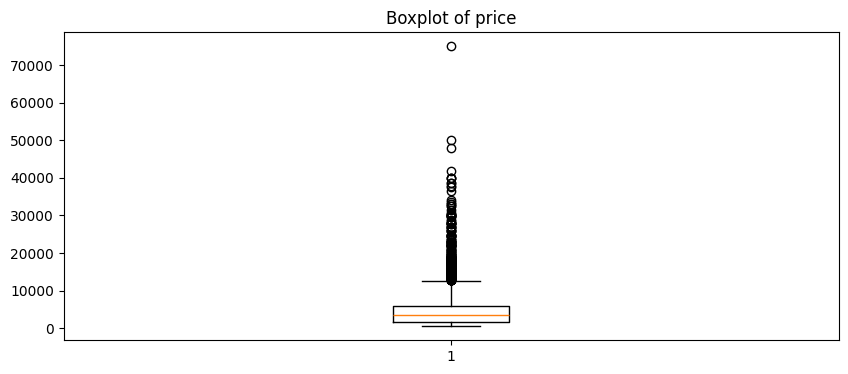

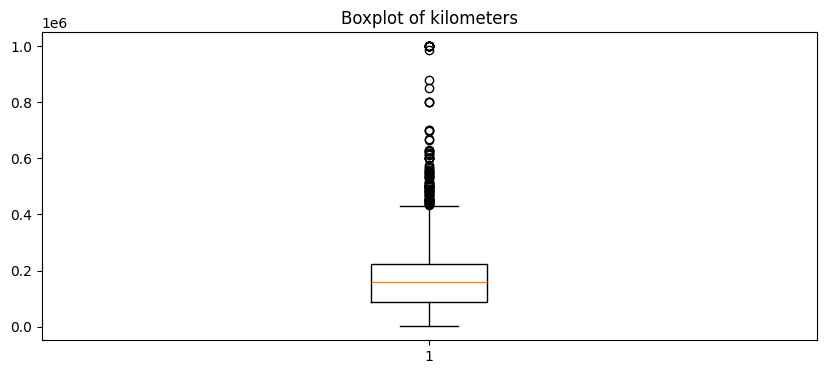

In [126]:
for num_col in numrical_cols:
    plt.figure(figsize=(10, 4))
    plt.boxplot(df[num_col])
    plt.title(f'Boxplot of {num_col}')

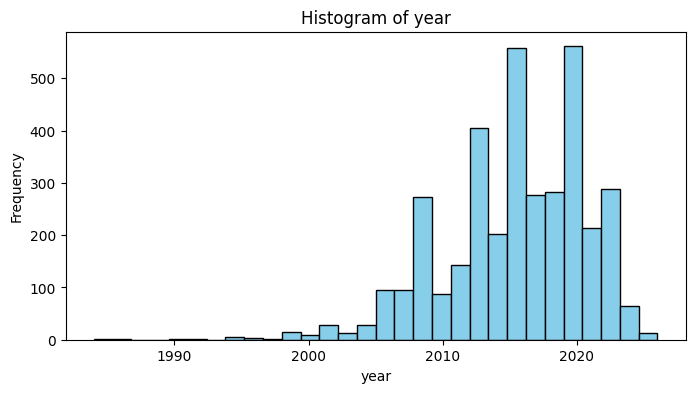

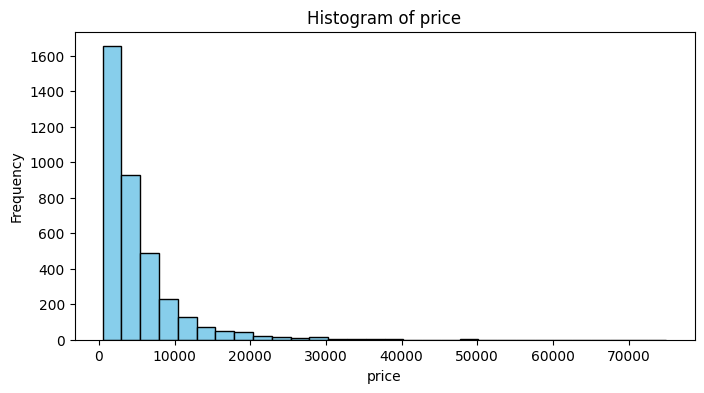

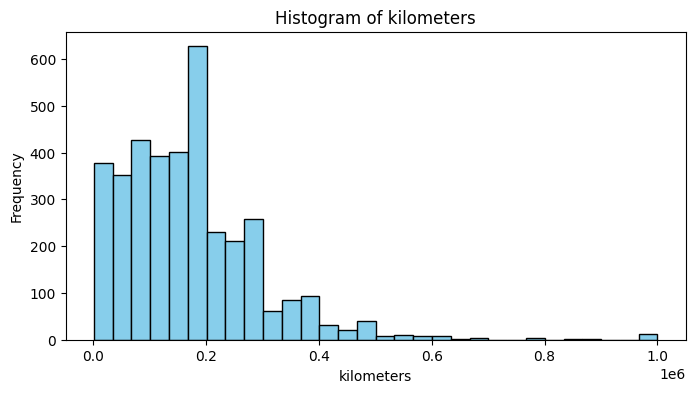

In [127]:
for col in numrical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [128]:
df

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota
...,...,...,...,...,...,...,...,...,...,...
6729,al khuwair muscat,2008,1500.0,18000,automatic,2/3,gcc,accord,black,honda
6730,azaiba muscat,2013,900.0,180000,automatic,4/5,company source,polo,silver,volkswagen
6731,saham al batinah,2021,5000.0,4500,automatic,4/5,us,renegade,white,jeep
6734,al khaboura al batinah,2016,5900.0,80000,automatic,4/5,us,e 350,black,mercedes


# 2- Feature Engineering

In [129]:
df["price"] = (
    df["price"]
      .astype(str)                      
      .str.replace(r"[^\d.]", "", regex=True)  
      .str.strip()                      
)

df["price"] = pd.to_numeric(df["price"], errors="coerce") 

- Converts the text column (transmission_type) into numeric values

In [130]:
df["transmission_encoded"] = (
    df["transmission_type"].str.strip().str.lower().map({"automatic": 1, "manual": 0})
)

df.head()

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand,transmission_encoded
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche,1
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche,1
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota,0
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia,1
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota,1


- Creat Feature for Price Categories

In [131]:
df["price_category"] = pd.cut(
    df["price"],
    bins=[0, 5000, 15000, 60000],
    labels=["Low", "Medium", "High"]
)

- We will count the Car Age by creat a new column

In [132]:
import datetime

In [133]:
current_year = datetime.datetime.now().year
df["car_age"] = current_year - df["year"]

In [134]:
df.head()

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand,transmission_encoded,price_category,car_age
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche,1,High,4
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche,1,High,6
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota,0,High,3
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia,1,Medium,1
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota,1,Medium,8


In [135]:
df["price_per_km"] = df["price"] / df["kilometers"]


In [136]:
print(df.columns)


Index(['location', 'year', 'price', 'kilometers', 'transmission_type',
       'number_of_doors', 'source', 'model', 'color', 'brand',
       'transmission_encoded', 'price_category', 'car_age', 'price_per_km'],
      dtype='object')


In [137]:
df["log_price"] = np.log1p(df["price"])

In [138]:
df["is_new"] = (df["car_age"] <= 3).astype(int)

In [139]:
df["price_per_year"] = (df["price"] / df["car_age"].replace(0, np.nan)).round(2)

In [140]:
df["doors_num"] = df["number_of_doors"].str.split("/").str[0].astype(int)

In [141]:
df.head()

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand,transmission_encoded,price_category,car_age,price_per_km,log_price,is_new,price_per_year,doors_num
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche,1,High,4,0.927907,10.594157,0,9975.00,4
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche,1,High,6,0.482759,10.239996,0,4666.67,4
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota,0,High,3,0.157786,10.106469,1,8166.67,4
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia,1,Medium,1,2.276452,9.433564,1,12500.00,4
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota,1,Medium,8,0.037352,8.732466,0,775.00,4


In [142]:
df.head()

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand,transmission_encoded,price_category,car_age,price_per_km,log_price,is_new,price_per_year,doors_num
0,al ghubrah muscat,2021,39900.0,43000,automatic,4/5,company source,taycan,white,porsche,1,High,4,0.927907,10.594157,0,9975.00,4
1,al ghubrah muscat,2019,28000.0,58000,automatic,4/5,company source,cayenne,purple,porsche,1,High,6,0.482759,10.239996,0,4666.67,4
2,ruwi muscat,2022,24500.0,155274,manual,4/5,gcc,land cruiser,white,toyota,0,High,3,0.157786,10.106469,1,8166.67,4
3,ruwi muscat,2024,12500.0,5491,automatic,4/5,gcc,k8,white,kia,1,Medium,1,2.276452,9.433564,1,12500.00,4
4,ruwi muscat,2017,6200.0,165989,automatic,4/5,gcc,rav 4,white,toyota,1,Medium,8,0.037352,8.732466,0,775.00,4


3- modeling

encoding object values 

In [143]:
df.dtypes

location                  object
year                       int64
price                    float64
kilometers                 int64
transmission_type         object
number_of_doors           object
source                    object
model                     object
color                     object
brand                     object
transmission_encoded       int64
price_category          category
car_age                    int64
price_per_km             float64
log_price                float64
is_new                     int64
price_per_year           float64
doors_num                  int64
dtype: object

In [144]:
def label_encode_object_cols(df: pd.DataFrame):
    df_encoded = df.copy()
    encoders = {}
    for col in df_encoded.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le  # store encoder
    
    return df_encoded, encoders
df_encoded, encoders = label_encode_object_cols(df)

print("Original df shape:", df.shape)
print("Encoded df shape:", df_encoded.shape)
df_encoded.head(10)

Original df shape: (3661, 18)
Encoded df shape: (3661, 18)


,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand,transmission_encoded,price_category,car_age,price_per_km,log_price,is_new,price_per_year,doors_num
0,6,2021,39900.0,43000,0,1,1,438,13,46,1,High,4,0.927907,10.594157,0,9975.00,4
1,6,2019,28000.0,58000,0,1,1,96,10,46,1,High,6,0.482759,10.239996,0,4666.67,4
2,55,2022,24500.0,155274,1,1,3,281,13,57,0,High,3,0.157786,10.106469,1,8166.67,4
3,55,2024,12500.0,5491,0,1,3,274,13,33,1,Medium,1,2.276452,9.433564,1,12500.00,4
4,55,2017,6200.0,165989,0,1,3,380,13,57,1,Medium,8,0.037352,8.732466,0,775.00,4
8,13,2020,20200.0,60000,0,1,4,221,2,40,1,High,5,0.336667,9.913487,0,4040.00,4
9,8,2022,6000.0,87000,0,1,3,36,2,39,1,Medium,3,0.068966,8.699681,1,2000.00,4
10,11,2020,7400.0,39000,0,1,4,116,5,36,1,Medium,5,0.189744,8.909370,0,1480.00,4
11,13,2021,17500.0,95000,0,1,4,435,13,9,1,High,4,0.184211,9.770013,0,4375.00,4
12,13,2020,7500.0,77000,0,1,4,404,13,26,1,Medium,5,0.097403,8.922792,0,1500.00,4


In [145]:
mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_encoded['price_category_enc'] = df_encoded['price_category'].map(mapping).astype('Int64')


In [146]:
df_encoded['price_category_enc']


0       2
1       2
2       2
3       1
4       1
       ..
6729    0
6730    0
6731    0
6734    1
6736    0
Name: price_category_enc, Length: 3661, dtype: Int64

In [147]:
df_encoded.drop(columns='price_category', inplace=True)
df_encoded.head()

,location,year,price,kilometers,transmission_type,number_of_doors,source,model,color,brand,transmission_encoded,car_age,price_per_km,log_price,is_new,price_per_year,doors_num,price_category_enc
0,6,2021,39900.0,43000,0,1,1,438,13,46,1,4,0.927907,10.594157,0,9975.00,4,2
1,6,2019,28000.0,58000,0,1,1,96,10,46,1,6,0.482759,10.239996,0,4666.67,4,2
2,55,2022,24500.0,155274,1,1,3,281,13,57,0,3,0.157786,10.106469,1,8166.67,4,2
3,55,2024,12500.0,5491,0,1,3,274,13,33,1,1,2.276452,9.433564,1,12500.00,4,1
4,55,2017,6200.0,165989,0,1,3,380,13,57,1,8,0.037352,8.732466,0,775.00,4,1


now start modeling 

In [148]:
df_encoded.dtypes

location                  int64
year                      int64
price                   float64
kilometers                int64
transmission_type         int64
number_of_doors           int64
source                    int64
model                     int64
color                     int64
brand                     int64
transmission_encoded      int64
car_age                   int64
price_per_km            float64
log_price               float64
is_new                    int64
price_per_year          float64
doors_num                 int64
price_category_enc        Int64
dtype: object

In [149]:
leak_cols = {'price', 'log_price', 'price_per_km', 'price_per_year'}
feature_cols = [c for c in df_encoded.columns if c not in (leak_cols | {'price_category_enc'})]

X_reg = df_encoded[feature_cols]
y_reg = df_encoded['price'].astype(float)

#2) Split for train and test
Xtr, Xte, ytr, yte = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

#  3) Pipeline: impute (median) -> RandomForest ---
reg_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('rf', RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

#  4) Cross-validation on train (RMSE) ---
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = (-cross_val_score(reg_pipe, Xtr, ytr, cv=cv,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1)).mean()

#  5) Fit + evaluate on holdout ---
reg_pipe.fit(Xtr, ytr)
pred = reg_pipe.predict(Xte)
rmse = np.sqrt(mean_squared_error(yte, pred))
r2   = r2_score(yte, pred)

print(f"CV RMSE (train): {cv_rmse:.2f}")
print(f"Holdout RMSE:    {rmse:.2f}")
print(f"Holdout R^2:     {r2:.3f}")

#  6) Top features ---
rf = reg_pipe.named_steps['rf']
importances = pd.Series(rf.feature_importances_, index=feature_cols).sort_values(ascending=False)
display(importances.head(15))

CV RMSE (train): 3480.06
Holdout RMSE:    3293.46
Holdout R^2:     0.573


model                   0.218855
car_age                 0.199546
year                    0.176616
brand                   0.111633
kilometers              0.110402
location                0.078750
color                   0.043327
source                  0.042130
is_new                  0.006886
transmission_type       0.003037
transmission_encoded    0.002974
doors_num               0.002958
number_of_doors         0.002884
dtype: float64

 using another model (Gradient Boosting (XGBoost))

In [150]:
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb.fit(Xtr, ytr)
pred_xgb = xgb.predict(Xte)

print("XGBoost R²:", r2_score(yte, pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(yte, pred_xgb)))


XGBoost R²: 0.6786686210134516
XGBoost RMSE: 2855.8561149074835


using Gradient Boosting (LightGBM)

In [151]:
lgbm = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

lgbm.fit(Xtr, ytr)
pred_lgb = lgbm.predict(Xte)

print("LightGBM R²:", r2_score(yte, pred_lgb))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(yte, pred_lgb)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 2928, number of used features: 13
[LightGBM] [Info] Start training from score 4893.312158
LightGBM R²: 0.7130803492690989
LightGBM RMSE: 2698.608603878389


using RandomizedSearchCV

In [152]:
param_grid = {
    'num_leaves': [31, 50, 100, 200],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [200, 500, 1000],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_grid,
    n_iter=25,  # increase for better results
    scoring='r2',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

search.fit(Xtr, ytr)
print("Best R²:", search.best_score_)
print("Best params:", search.best_params_)


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 686
[LightGBM] [Info] Number of data points in the train set: 2928, number of used features: 13
[LightGBM] [Info] Start training from score 4893.312158
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

try to try with onehot encoding 

In [153]:
df_onehot = df.copy()
cat_cols = df_onehot.select_dtypes(include=['object']).columns
df_onehot = pd.get_dummies(df_onehot, columns=cat_cols, drop_first=False)

print("Original shape:", df.shape)
print("One-hot encoded shape:", df_onehot.shape)
df_onehot.head()

Original shape: (3661, 18)
One-hot encoded shape: (3661, 663)


,year,price,kilometers,transmission_encoded,price_category,car_age,price_per_km,log_price,is_new,price_per_year,...,brand_renault,brand_skoda,brand_ssang yong,brand_subaru,brand_suzuki,brand_tank,brand_tesla,brand_toyota,brand_volkswagen,brand_volvo
0,2021,39900.0,43000,1,High,4,0.927907,10.594157,0,9975.00,...,False,False,False,False,False,False,False,False,False,False
1,2019,28000.0,58000,1,High,6,0.482759,10.239996,0,4666.67,...,False,False,False,False,False,False,False,False,False,False
2,2022,24500.0,155274,0,High,3,0.157786,10.106469,1,8166.67,...,False,False,False,False,False,False,False,True,False,False
3,2024,12500.0,5491,1,Medium,1,2.276452,9.433564,1,12500.00,...,False,False,False,False,False,False,False,False,False,False
4,2017,6200.0,165989,1,Medium,8,0.037352,8.732466,0,775.00,...,False,False,False,False,False,False,False,True,False,False


In [154]:
df_onehot = pd.get_dummies(df_onehot, columns=['price_category'], drop_first=False)
df_onehot.head()

,year,price,kilometers,transmission_encoded,car_age,price_per_km,log_price,is_new,price_per_year,doors_num,...,brand_subaru,brand_suzuki,brand_tank,brand_tesla,brand_toyota,brand_volkswagen,brand_volvo,price_category_Low,price_category_Medium,price_category_High
0,2021,39900.0,43000,1,4,0.927907,10.594157,0,9975.00,4,...,False,False,False,False,False,False,False,False,False,True
1,2019,28000.0,58000,1,6,0.482759,10.239996,0,4666.67,4,...,False,False,False,False,False,False,False,False,False,True
2,2022,24500.0,155274,0,3,0.157786,10.106469,1,8166.67,4,...,False,False,False,False,True,False,False,False,False,True
3,2024,12500.0,5491,1,1,2.276452,9.433564,1,12500.00,4,...,False,False,False,False,False,False,False,False,True,False
4,2017,6200.0,165989,1,8,0.037352,8.732466,0,775.00,4,...,False,False,False,False,True,False,False,False,True,False


In [155]:
df_onehot = df_encoded.copy()
obj_cols = df_onehot.select_dtypes(include=['object']).columns.tolist()
df_onehot = pd.get_dummies(df_onehot, columns=obj_cols, drop_first=True, dtype=int)

# 2) Build features/target from the ONE-HOT frame (avoid leakage)
leak_cols = {'price', 'log_price', 'price_per_km', 'price_per_year'}  # targets/derivatives
exclude = leak_cols  # add anything else you wish to exclude

feature_cols = [c for c in df_onehot.columns if c not in exclude]  # use df_onehot.columns here
X = df_onehot[feature_cols]
y = df_onehot['price'].astype(float)

# 3) Train/test split
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# 4) Pipeline: impute -> RF (baseline)
reg_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('rf', RandomForestRegressor(
        n_estimators=400,
        max_depth=None,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ))
])

# 5) CV + holdout metrics
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_rmse = (-cross_val_score(reg_pipe, Xtr, ytr, cv=cv,
                            scoring='neg_root_mean_squared_error',
                            n_jobs=-1)).mean()

reg_pipe.fit(Xtr, ytr)
pred = reg_pipe.predict(Xte)
rmse = np.sqrt(mean_squared_error(yte, pred))
r2   = r2_score(yte, pred)

print(f"CV RMSE (train): {cv_rmse:.2f}")
print(f"Holdout RMSE:    {rmse:.2f}")
print(f"Holdout R^2:     {r2:.3f}")

CV RMSE (train): 2302.48
Holdout RMSE:    2098.59
Holdout R^2:     0.826


using XGBRegressor

In [156]:
xgb = XGBRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(Xtr, ytr)
pred_xgb = xgb.predict(Xte)

print("XGBoost R²:", r2_score(yte, pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(yte, pred_xgb)))


XGBoost R²: 0.8516859357255908
XGBoost RMSE: 1940.2197540699713


using LightGBM

In [157]:
lgbm = lgb.LGBMRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    max_depth=-1,
    num_leaves=64,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
lgbm.fit(Xtr, ytr)
pred_lgb = lgbm.predict(Xte)

print("LightGBM R²:", r2_score(yte, pred_lgb))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(yte, pred_lgb)))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 690
[LightGBM] [Info] Number of data points in the train set: 2928, number of used features: 14
[LightGBM] [Info] Start training from score 4893.312158
LightGBM R²: 0.8474452351304756
LightGBM RMSE: 1967.7623299749384


Hyperparameter Tuning

In [158]:
param_grid = {
    'n_estimators': [500, 1000, 1500],
    'max_depth': [6, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

search = RandomizedSearchCV(
    estimator=XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_grid,
    n_iter=20,
    scoring='r2',
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

search.fit(Xtr, ytr)
print("Best CV R²:", search.best_score_)
print("Best Params:", search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best CV R²: 0.8418652875528956
Best Params: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.8}


Ordinary Linear Regression

In [159]:
linreg_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # fill NaN with median
    ('model', LinearRegression(n_jobs=-1))
])

linreg_pipe.fit(Xtr, ytr)
pred_lin = linreg_pipe.predict(Xte)

print("Linear Regression R²:", r2_score(yte, pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(yte, pred_lin)))


Linear Regression R²: 0.741288359402541
Linear Regression RMSE: 2562.522804272942


In [160]:
dfm = df_onehot.copy()

# IQR trim on price and kilometers
def iqr_trim(s, k=3.0):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lo, hi = q1 - k*iqr, q3 + k*iqr
    return (s >= lo) & (s <= hi)

mask = iqr_trim(dfm['price']) & iqr_trim(dfm['kilometers'])
dfm = dfm[mask].reset_index(drop=True)

# log target
y_log = np.log1p(dfm['price'])
X = dfm.drop(columns=['price','log_price','price_per_km','price_per_year'], errors='ignore')

from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y_log, test_size=0.2, random_state=42)


In [161]:
xgb = XGBRegressor(
    n_estimators=1600, learning_rate=0.04,
    max_depth=9, subsample=0.85, colsample_bytree=0.85,
    min_child_weight=2, reg_alpha=0.0, reg_lambda=1.0,
    random_state=42, n_jobs=-1
)
xgb.fit(Xtr, ytr)
pred_log = xgb.predict(Xte)

# back-transform
y_true = np.expm1(yte)
y_pred = np.expm1(pred_log)

import numpy as np
print("R²:", r2_score(y_true, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))


R²: 0.894546554312074
RMSE: 1188.8730053659176


In [162]:
# joblib.dump(reg_pipe, "model.joblib")         # your fitted Pipeline (e.g., imputer -> RF)
# feature_cols = list(X_reg.columns)            # columns after pd.get_dummies during training
# with open("feature_columns.json", "w") as f:
#     json.dump(feature_cols, f, indent=2)

In [163]:
# # columns that must NOT go into training (leakage or target-like)
# leak_cols = {
#     'price', 'log_price', 'price_per_km', 'price_per_year',
#     'price_category', 'price_category_enc'
# }

# # df_encoded is your one-hot encoded dataframe
# feature_cols = [c for c in df_encoded.columns if c not in leak_cols]

# X_reg = df_encoded[feature_cols].copy()
# y_reg = df_encoded['price'].astype(float)

# # 🔹 Save feature column names for inference
# import json
# with open("feature_columns.json", "w") as f:
#     json.dump(list(X_reg.columns), f, indent=2)

# # fit your final pipeline/model on X_reg, y_reg
# reg_pipe.fit(X_reg, y_reg)

# # 🔹 Save the trained model too
# import joblib
# joblib.dump(reg_pipe, "model.joblib")


In [164]:
# import joblib, json
# joblib.dump(reg_pipe, "model.joblib")
# with open("feature_columns.json", "w") as f:
#     json.dump(list(X_reg.columns), f, indent=2)


In [165]:
# joblib.dump(reg_pipe, "model.joblib")

# # Save the feature columns
# feature_cols = list(X_reg.columns)
# with open("feature_columns.json", "w") as f:
#     json.dump(feature_cols, f, indent=2)

# # Also export categorical options for dropdowns
# brands = sorted(df['brand'].unique().tolist())
# with open("brands.json", "w") as f:
#     json.dump(brands, f)

# models = sorted(df['model'].unique().tolist())
# with open("models.json", "w") as f:
#     json.dump(models, f)

In [166]:
# # import json

# cat_options = {
#     "brands": sorted(df["brand"].unique().tolist()),
#     "models": sorted(df["model"].unique().tolist()),
#     "transmission": sorted(df["transmission_type"].unique().tolist()),
#     "source": sorted(df["source"].unique().tolist()),
#     "color": sorted(df["color"].unique().tolist()),
# }

# with open("categories.json", "w") as f:
#     json.dump(cat_options, f, indent=2)


In [167]:

# # Build models_by_brand for filtered dropdowns
# models_by_brand = (
#     df.groupby("brand")["model"]
#       .apply(lambda s: sorted(s.dropna().astype(str).unique().tolist()))
#       .to_dict()
# )

# # Build per-(brand,model) defaults using median/mode
# def _mode_or(default):
#     return lambda s: (s.mode().iloc[0] if not s.mode().empty else default)

# profile = (
#     df.groupby(["brand","model"])
#       .agg(
#           year_median=("year", "median"),
#           km_median=("kilometers", "median"),
#           doors_mode=("doors_num", _mode_or(4)),
#           transmission_mode=("transmission_type", _mode_or("Automatic")),
#           color_mode=("color", _mode_or("White")),
#           source_mode=("source", _mode_or("GCC")),
#       )
#       .reset_index()
# )

# # Nest to {brand: {model: {field: value, ...}}}
# defaults = {}
# for _, r in profile.iterrows():
#     b = str(r["brand"]); m = str(r["model"])
#     defaults.setdefault(b, {})[m] = {
#         "year": int(round(r["year_median"])) if not np.isnan(r["year_median"]) else 2018,
#         "kilometers": int(round(r["km_median"])) if not np.isnan(r["km_median"]) else 85000,
#         "doors_num": int(r["doors_mode"]) if pd.notna(r["doors_mode"]) else 4,
#         "transmission_type": str(r["transmission_mode"]),
#         "color": str(r["color_mode"]),
#         "source": str(r["source_mode"]),
#     }

# # Extend your existing categories.json content
# cat_options = {
#     "brands": sorted(df["brand"].dropna().astype(str).unique().tolist()),
#     "models": sorted(df["model"].dropna().astype(str).unique().tolist()),
#     "models_by_brand": models_by_brand,       # NEW
#     "transmission": sorted(df["transmission_type"].dropna().astype(str).unique().tolist()),
#     "source": sorted(df["source"].dropna().astype(str).unique().tolist()),
#     "color": sorted(df["color"].dropna().astype(str).unique().tolist()),
#     "defaults": defaults                      # <<— NEW: per (brand,model) defaults
# }

# with open("categories.json", "w") as f:
#     json.dump(cat_options, f, indent=2)


In [168]:
# # ==== Export artifacts for the Streamlit app ====
# import json, joblib, numpy as np, pandas as pd

# # -------------------------------------------------
# # 1) TRAINING MATRIX (exclude leakage / target-like cols)
# #    df_encoded: your one-hot encoded dataframe (e.g., from pd.get_dummies)
# #    reg_pipe  : your final sklearn Pipeline / model, defined earlier
# # -------------------------------------------------
# leak_cols = {
#     "price", "log_price", "price_per_km", "price_per_year",
#     "price_category", "price_category_enc"
# }
# feature_cols = [c for c in df_encoded.columns if c not in leak_cols]

# X_reg = df_encoded[feature_cols].copy()
# y_reg = df_encoded["price"].astype(float)

# # Fit and save the trained model
# reg_pipe.fit(X_reg, y_reg)
# joblib.dump(reg_pipe, "model.joblib")
# print("✔ Saved model.joblib")

# # Save the exact training columns (list) for inference alignment
# with open("feature_columns.json", "w", encoding="utf-8") as f:
#     json.dump(list(X_reg.columns), f, indent=2, ensure_ascii=False)
# print(f"✔ Saved feature_columns.json with {X_reg.shape[1]} columns")

# # -------------------------------------------------
# # 2) UI OPTIONS + PER-(BRAND,MODEL) DEFAULTS  → categories.json
# #    Use the *raw/cleaned* df (before one-hot), called `df` here.
# #    If your frame has different column names, adjust below.
# # -------------------------------------------------
# df_def = df.copy()

# # normalize types
# for col in ["brand", "model", "transmission_type", "color", "source"]:
#     if col in df_def.columns:
#         df_def[col] = df_def[col].astype(str).str.strip()

# # numerics
# if "year" in df_def.columns:
#     df_def["year"] = pd.to_numeric(df_def["year"], errors="coerce")
# if "kilometers" in df_def.columns:
#     df_def["kilometers"] = pd.to_numeric(df_def["kilometers"], errors="coerce")

# # doors can be messy like "4/5" → extract first integer; coerce to NaN if none
# if "number_of_doors" in df_def.columns:
#     doors_extracted = df_def["number_of_doors"].astype(str).str.extract(r"(\d+)", expand=False)
#     df_def["number_of_doors_clean"] = pd.to_numeric(doors_extracted, errors="coerce")
# else:
#     df_def["number_of_doors_clean"] = np.nan

# # Brand → Models mapping
# if {"brand","model"}.issubset(df_def.columns):
#     models_by_brand = (
#         df_def.groupby("brand")["model"]
#               .apply(lambda s: sorted(s.dropna().unique().tolist()))
#               .to_dict()
#     )
# else:
#     models_by_brand = {}

# # safe mode helper
# def _mode_or(series, fallback):
#     s = series.dropna()
#     if s.empty: return fallback
#     m = s.mode()
#     return m.iloc[0] if not m.empty else fallback

# # per-(brand,model) defaults
# if {"brand","model"}.issubset(df_def.columns):
#     profile = (
#         df_def.groupby(["brand","model"])
#               .agg(
#                   year_median=("year", "median") if "year" in df_def.columns else ("brand","count"),
#                   km_median=("kilometers", "median") if "kilometers" in df_def.columns else ("brand","count"),
#                   doors_mode=("number_of_doors_clean", lambda s: _mode_or(s, 4)),
#                   trans_mode=("transmission_type", lambda s: _mode_or(s, "Automatic")) if "transmission_type" in df_def.columns else ("brand","count"),
#                   color_mode=("color", lambda s: _mode_or(s, "White")) if "color" in df_def.columns else ("brand","count"),
#                   source_mode=("source", lambda s: _mode_or(s, "GCC")) if "source" in df_def.columns else ("brand","count"),
#               )
#               .reset_index()
#     )
# else:
#     profile = pd.DataFrame(columns=["brand","model","year_median","km_median","doors_mode","trans_mode","color_mode","source_mode"])

# defaults = {}
# for _, r in profile.iterrows():
#     b = str(r.get("brand",""))
#     m = str(r.get("model",""))
#     if not b or not m: 
#         continue
#     defaults.setdefault(b, {})[m] = {
#         "year": int(round(r["year_median"])) if ("year_median" in r and pd.notna(r["year_median"])) else 2018,
#         "kilometers": int(round(r["km_median"])) if ("km_median" in r and pd.notna(r["km_median"])) else 85000,
#         "number_of_doors": int(r["doors_mode"]) if ("doors_mode" in r and pd.notna(r["doors_mode"])) else 4,
#         "transmission_type": str(r.get("trans_mode", "Automatic")),
#         "color": str(r.get("color_mode", "White")),
#         "source": str(r.get("source_mode", "GCC")),
#     }

# # top-level dropdown lists (fallbacks if columns missing)
# categories = {
#     "brands": sorted(df_def["brand"].dropna().unique().tolist()) if "brand" in df_def.columns else [],
#     "models": sorted(df_def["model"].dropna().unique().tolist()) if "model" in df_def.columns else [],
#     "models_by_brand": models_by_brand,
#     "transmission": sorted(df_def["transmission_type"].dropna().unique().tolist()) if "transmission_type" in df_def.columns else ["Automatic","Manual"],
#     "source": sorted(df_def["source"].dropna().unique().tolist()) if "source" in df_def.columns else ["GCC","US","EU","Japan"],
#     "color": sorted(df_def["color"].dropna().unique().tolist()) if "color" in df_def.columns else ["White","Black","Silver","Gray","Blue","Red"],
#     "defaults": defaults,
# }

# with open("categories.json", "w", encoding="utf-8") as f:
#     json.dump(categories, f, indent=2, ensure_ascii=False)
# print("✔ Saved categories.json")
# # ==== End export cell ====


In [169]:
# === Wrap your FINAL model in a preprocessing Pipeline and save ===

# Your raw input columns (rename to match your df as needed)
RAW_FEATURE_COLS = [
    "brand","model","year","trim","color",
    "transmission_type","number_of_doors","source","kilometers"
]
TARGET_COL = "price"

# Use the same df you trained on (raw, not one-hot)
use_cols = [c for c in RAW_FEATURE_COLS if c in df.columns]
assert TARGET_COL in df.columns, "price column not found"
train = df.dropna(subset=[TARGET_COL]).copy()
X_raw = train[use_cols]
y = train[TARGET_COL].astype(float).values

# Split numeric vs categorical automatically
num_cols = X_raw.select_dtypes(include=["int64","float64","Int64","Float64"]).columns.tolist()
cat_cols = [c for c in X_raw.columns if c not in num_cols]

# Preprocessor: impute numerics, OHE categoricals (ignore unseen at inference)
pre = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="median"), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("ohe", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop",
    verbose_feature_names_out=False
)

# ⬇️ Use your final trained model object here
reg = xgb  # e.g., xgb, lgbm, or rf

pipe = Pipeline([("pre", pre), ("reg", reg)])
pipe.fit(X_raw, y)  # trains preprocessor + (re)fits reg on same data

joblib.dump(pipe, "car_price_pipeline.joblib")
print("Saved -> car_price_pipeline.joblib")


Saved -> car_price_pipeline.joblib


In [170]:
catalog_cols = ["brand","model","year","trim","color",
                "transmission_type","number_of_doors","source",
                "kilometers","price"]
have = [c for c in catalog_cols if c in df.columns]

catalog = df[have].dropna(subset=[c for c in ["brand","model"] if c in have]).copy()

# keep unique combos so dropdowns are clean
dedup_cols = [c for c in ["brand","model","year","trim","color",
                          "transmission_type","number_of_doors","source"] if c in have]
if dedup_cols:
    catalog = catalog.drop_duplicates(subset=dedup_cols)

catalog.to_csv("catalog.csv", index=False)
print(f"Saved -> catalog.csv (rows: {len(catalog):,})")

Saved -> catalog.csv (rows: 3,096)
